In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os
import time

In [18]:
pathIn = "E:/Code/Anime Faces/portraits/"
pathOut_edge = "./input_py_edge_30w/"
pathOut_color = "./input_py_color_30w/"
pathOut_target = "./target_py_30w/"

names = os.listdir(pathIn)

In [20]:
start_time = time.time()

data_size  = 300000

step_mark = data_size // 1000

for index in range(data_size):
    img = cv2.imread(pathIn + names[index])

    cv2.imwrite(pathOut_target + "{}.jpg".format(index), img)

    # Color extraction & abstraction

    img_color = cv2.GaussianBlur(img, (101, 101), cv2.BORDER_DEFAULT)
    img_color[img_color <= 85] = 0
    img_color[(img_color <= 170) & (img_color > 85)] = 127
    img_color[(img_color <= 255) & (img_color > 170)] = 255

    cv2.imwrite(pathOut_color + "{}.jpg".format(index), img_color)

    # Edge extraction

    img_edge = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_edge = cv2.GaussianBlur(img_edge, (5, 5), cv2.BORDER_DEFAULT)
    img_edge = cv2.Canny(img_edge, 128, 200)

    # Edge filter / thickness increase

    contours, hierarchy = cv2.findContours(img_edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    img_edge = img_edge * 0 + 255

    for contour in contours:
        if len(contour) > 100:
            # cv2.drawContours(img_edge, contour, -1, [0, 0, 0], 5)
            cv2.drawContours(img_edge, contour, -1, [0], 5)

    cv2.imwrite(pathOut_edge + "{}.jpg".format(index), img_edge)

    # apply edges to colored image

    # cv2.imwrite(pathOut + names[index], img_color)

    if index > 0 and (index % step_mark) == 0:
        used_time = time.time() - start_time
        ratio_finished = index / data_size
        print("{:.1f}% finished. time remaining: {:.2f} mins".format(100 * ratio_finished, (used_time / ratio_finished - used_time) / 60))

end_time = time.time()

print("run time = {:.2f}".format(end_time - start_time))

0 mins
53.6% finished. time remaining: 114.75 mins
53.7% finished. time remaining: 114.51 mins
53.8% finished. time remaining: 114.26 mins
53.9% finished. time remaining: 114.03 mins
54.0% finished. time remaining: 113.78 mins
54.1% finished. time remaining: 113.54 mins
54.2% finished. time remaining: 113.30 mins
54.3% finished. time remaining: 113.05 mins
54.4% finished. time remaining: 112.88 mins
54.5% finished. time remaining: 112.63 mins
54.6% finished. time remaining: 112.38 mins
54.7% finished. time remaining: 112.13 mins
54.8% finished. time remaining: 111.88 mins
54.9% finished. time remaining: 111.63 mins
55.0% finished. time remaining: 111.39 mins
55.1% finished. time remaining: 111.16 mins
55.2% finished. time remaining: 110.91 mins
55.3% finished. time remaining: 110.65 mins
55.4% finished. time remaining: 110.39 mins
55.5% finished. time remaining: 110.17 mins
55.6% finished. time remaining: 109.92 mins
55.7% finished. time remaining: 109.67 mins
55.8% finished. time rema

In [4]:
pathOut_target + "{}.jpg".format(index)

'./Data/target_py/0.jpg'

In [10]:
print("run time = {} %".format(end_time - start_time))

run time = 47.156498432159424 %f


In [5]:
for index in range(len(names)):
    img = cv2.imread(pathIn + names[index])
    #plt.figure()
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    #img = cv2.resize(img, (2048, 2048))
    img_edge = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)
    img_color = cv2.GaussianBlur(img, (101, 101), cv2.BORDER_DEFAULT)
    #img = cv2.resize(img, (512, 512))

    #cv2.imwrite("1 - denoised.png", img)
    #plt.figure()
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    img_edge = cv2.Canny(img, 128, 225)
    #cv2.imwrite("2 - edge.png", img)
    #plt.figure()
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    img_edge = 255 - img_edge
    #cv2.imwrite(pathOut + names[index], img_edge)
    #plt.figure()
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # img_color[img_color <= 50] = 50
    # img_color[(img_color <= 100) & (img_color > 50)] = 100
    # img_color[(img_color <= 150) & (img_color > 100)] = 150
    # img_color[(img_color <= 200) & (img_color > 150)] = 200
    # img_color[(img_color <= 255) & (img_color > 200)] = 255
    
    img_color[img_color <= 85] = 0
    img_color[(img_color <= 170) & (img_color > 85)] = 127
    img_color[(img_color <= 255) & (img_color > 170)] = 255
    
    
    cv2.imwrite(pathColor + names[index], img_color)
    
    img_color[:,:,0] = img_color[:,:,0] * (img_edge / 255)
    img_color[:,:,1] = img_color[:,:,1] * (img_edge / 255)
    img_color[:,:,2] = img_color[:,:,2] * (img_edge / 255)

    cv2.imwrite(pathOut + names[index], img_color)

152


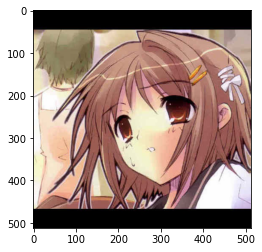

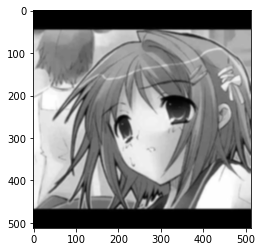

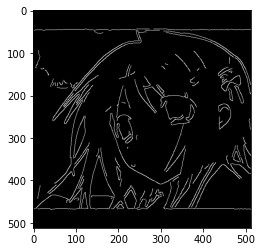

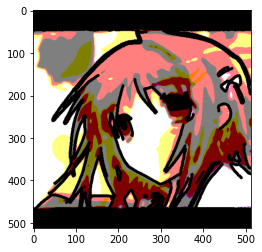

In [129]:
img_path = "./data/target/20.jpg"
img = cv2.imread(img_path)
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img_color = cv2.GaussianBlur(img, (101, 101), cv2.BORDER_DEFAULT)
img_color[img_color <= 85] = 0
img_color[(img_color <= 170) & (img_color > 85)] = 127
img_color[(img_color <= 255) & (img_color > 170)] = 255

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5, 5), cv2.BORDER_DEFAULT)

plt.figure()
plt.imshow(img_blur, "gray")

img_edge = cv2.Canny(img_blur, 128, 200)
plt.figure()
plt.imshow(img_edge, "gray")

# cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(img_edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print(len(contours))

plt.figure()
plt.imshow(img_edge, "gray")

for contour in contours:
    if len(contour) > 100:
        cv2.drawContours(img_color, contour, -1, [0, 0, 0], 5)

plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

In [17]:
# rename

start_time = time.time()

data_size  = 31483

step_mark = data_size // 1000


pathRef = "E:/Code/CS566/WaifuGenerator/data/input_ps/"
pathIn = "E:/Code/CS566/WaifuGenerator/data/input_ps/"
pathOut = "./input_ps_edge/"

names = names = os.listdir(pathRef)

for index in range(31472, 31483):
    img = cv2.imread(pathIn + names[index])

    cv2.imwrite(pathOut + "{}.jpg".format(index), img)

    if index > 0 and (index % step_mark) == 0:
        used_time = time.time() - start_time
        ratio_finished = index / data_size
        print("{:.1f}% finished. time remaining: {:.2f} mins".format(100 * ratio_finished, (used_time / ratio_finished - used_time) / 60))

end_time = time.time()

print("run time = {:.2f}".format(end_time - start_time))

run time = 0.15


In [16]:
for i in range(200, 205):
    print(i)

200
201
202
203
204
